In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
univ1 = pd.read_excel("University_Clustering.xlsx")
univ1
univ1.columns

Index(['Univ', 'State', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses',
       'GradRate'],
      dtype='object')

In [83]:
univ1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ KB


As we are clustering on universities, we can drop other objects


In [102]:
univ= univ1.drop(['State'], axis = 1, errors = 'ignore')
univ

,clust,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,2,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,2,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,2,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,2,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,2,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


errors = ' ignore' , will remove errors while u drop any columns

In [85]:
univ.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


min, max varies for each column, so we can use standarization or normalization technique to keep the values same

Normalization => x =  (i- i.min())/(i.max() - i.min())

In [36]:
# normalization

def nor_func(i):
    x = (i-i.min())/(i.max()- i.min())
    return x

In [103]:
# using the nor_fun in dataframe

univ_norm = nor_func(univ.iloc[:,1:])
univ_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Therefore, Min and max for every colunmns are same now

we need to create a dendrogram to identify the no. of clusters

In [42]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as  sch

linkage is a function used to perfrom hierarchical/ agglomerativve clustering

    linkage(y, method = 'single', metric = 'euclidean', optimal_ordering = False)
    
    method we can use as per required there are few methods
    

In [104]:
z = linkage(univ_norm, method = 'complete', metric = 'euclidean')
z
# it has done the n cluisters to one cluster that u can visually seen in below dendrogram

array([[11.        , 21.        ,  0.10626637,  2.        ],
       [12.        , 22.        ,  0.13187683,  2.        ],
       [ 8.        , 24.        ,  0.13239629,  2.        ],
       [ 5.        ,  6.        ,  0.15357479,  2.        ],
       [ 4.        , 25.        ,  0.18518411,  3.        ],
       [10.        , 16.        ,  0.19782036,  2.        ],
       [28.        , 30.        ,  0.24629762,  4.        ],
       [ 0.        ,  7.        ,  0.26741814,  2.        ],
       [ 3.        , 29.        ,  0.27803629,  4.        ],
       [14.        , 27.        ,  0.30357016,  3.        ],
       [31.        , 34.        ,  0.34007072,  7.        ],
       [32.        , 33.        ,  0.34110215,  6.        ],
       [13.        , 23.        ,  0.39456348,  2.        ],
       [ 9.        , 19.        ,  0.4942792 ,  2.        ],
       [26.        , 36.        ,  0.50082808,  8.        ],
       [15.        , 17.        ,  0.55679044,  2.        ],
       [18.        , 20.

Text(0, 0.5, 'Distance')

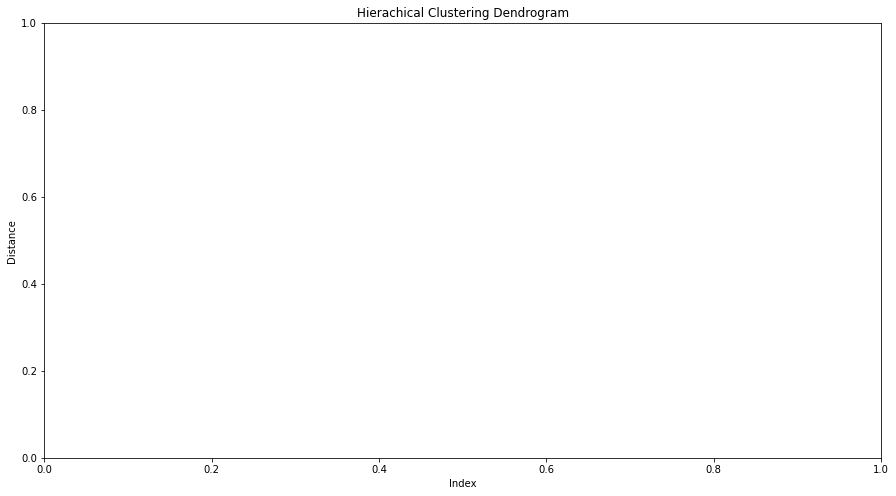

In [47]:
# dendrogram
plt.figure(figsize = (15,8));plt.title('Hierachical Clustering Dendrogram'); plt.xlabel('Index'); plt.ylabel('Distance')

# just mentioning the plot

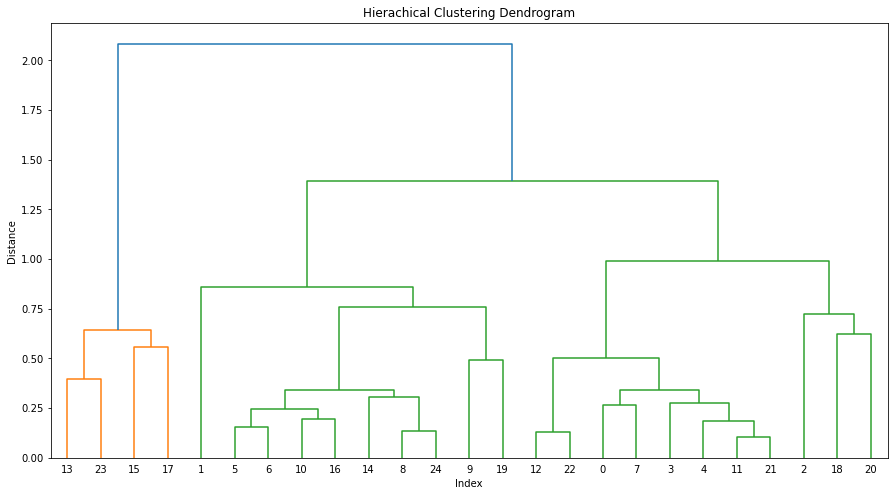

In [88]:
# dendrogram
plt.figure(figsize = (15,8));plt.title('Hierachical Clustering Dendrogram'); plt.xlabel('Index'); plt.ylabel('Distance')

# just mentioning the plot

sch.dendrogram(z, leaf_rotation=0, leaf_font_size=10)
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
h_complete = AgglomerativeClustering(n_clusters = 3, linkage='complete', affinity = 'euclidean').fit(univ_norm)
h_complete.labels_

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0,
       0, 1, 2], dtype=int32)

In [106]:
cluster_labels = pd.Series(h_complete.labels_)

In [110]:
univ['clust']=cluster_labels

In [111]:
univ

,clust,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,2,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
5,2,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333
6,2,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333
7,0,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
8,2,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000
9,2,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667


In [109]:
univ1= univ.iloc[:, [6,0,1,2,3,4,5]]
univ1

,GradRate,clust,SAT,Top10,Accept,SFRatio,Expenses
0,0.900000,0,0.743902,0.847222,0.105263,0.368421,0.255144
1,0.466667,2,1.000000,1.000000,0.144737,0.000000,1.000000
2,0.166667,0,0.621951,0.472222,0.592105,0.157895,0.297461
3,0.700000,0,0.743902,0.666667,0.131579,0.315789,0.415629
4,0.766667,0,0.670732,0.763889,0.250000,0.368421,0.239835
5,0.933333,2,0.817073,0.847222,0.118421,0.210526,0.427512
6,0.933333,2,0.756098,0.861111,0.210526,0.315789,0.416996
7,0.833333,0,0.609756,0.638889,0.131579,0.315789,0.208161
8,1.000000,2,0.963415,0.875000,0.000000,0.263158,0.561699
9,0.666667,2,0.731707,0.652778,0.394737,0.052632,0.910991


In [98]:
univ1.iloc[:,1:].groupby(univ.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,0.621951,0.705808,0.331340,0.358852,0.232234,0.687879
1,0.137805,0.149306,0.736842,0.697368,0.022762,0.158333
2,0.854878,0.847222,0.169737,0.210526,0.586707,0.823333


In [101]:
univ.to_csv("university.csv", encoding= "utf-8")